In [215]:
%run ../utils.ipynb

In [216]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
data_dir = f"{project_dir}data\\matchup_player_data\\"

In [218]:
df = pd.read_csv(data_dir + 'weekly_scoring_patterns.csv')

In [219]:
df = df[df['season_week'].str.contains('2023')]

In [220]:
df.shape

(224, 25)

In [221]:
df.set_index('season_week', inplace=True)

In [222]:
df.columns

Index(['QB_points', 'WR1_points', 'WR2_points', 'WR3_points', 'RB1_points',
       'RB2_points', 'TE_points', 'W/R/T_points', 'DEF_points', 'BN1_points',
       'BN2_points', 'BN3_points', 'BN4_points', 'BN5_points', 'BN6_points',
       'BN7_points', 'W/R/T position', 'WR_total_points', 'RB_total_points',
       'TE_total_points', 'BN_points', 'manager', 'win', 'points_for'],
      dtype='object')

In [223]:
cols = ['manager', 'QB_points', 'DEF_points', 'WR_total_points', 'RB_total_points','TE_total_points']

In [224]:
df = df[cols]

''

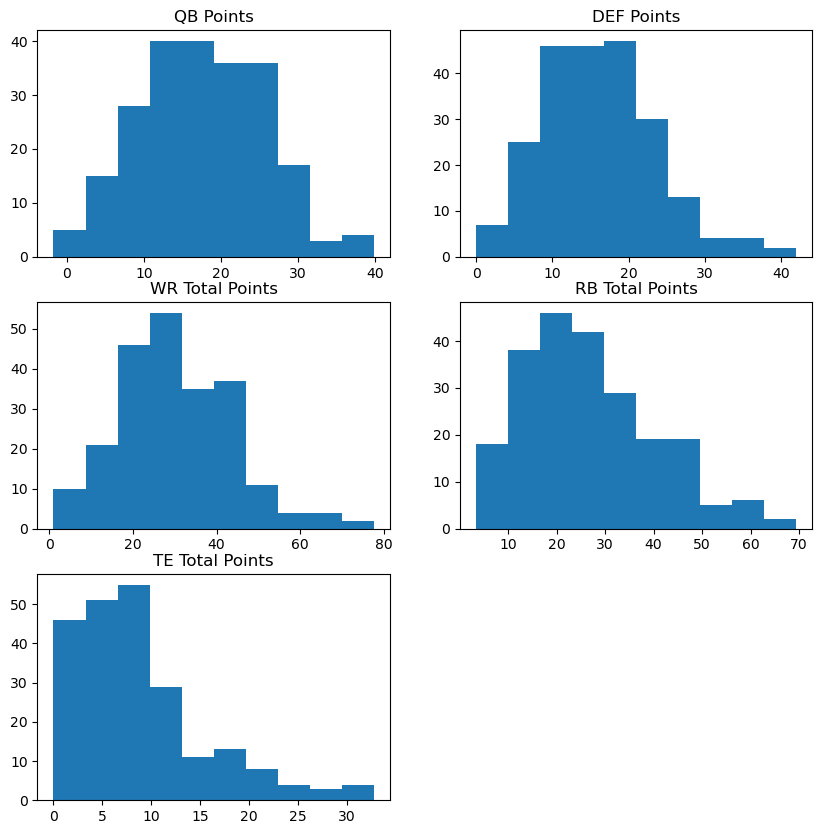

In [225]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax1.hist(df['QB_points'])
ax1.title.set_text('QB Points')


ax2= fig.add_subplot(322)
ax2.hist(df['DEF_points'])
ax2.title.set_text('DEF Points')


ax3= fig.add_subplot(323)
ax3.hist(df['WR_total_points'])
ax3.title.set_text('WR Total Points')

ax4= fig.add_subplot(324)
ax4.hist(df['RB_total_points'])
ax4.title.set_text('RB Total Points')

ax5 = fig.add_subplot(325)
ax5.hist(df['TE_total_points'])
ax5.title.set_text('TE Total Points')
;

In [226]:
X_mean = df.groupby('manager').agg(['mean'])

In [227]:
X_std = df.groupby('manager').agg(['std'])

In [228]:
X_mean

,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points
,mean,mean,mean,mean,mean
manager,,,,,
Buddy,22.414286,15.071429,29.178571,15.564286,11.400000
Eric,17.180000,14.352941,26.923529,27.376471,12.576471
Frags,19.364286,9.571429,27.857143,18.721429,6.207143
Jake,14.417500,16.500000,35.781250,25.325000,6.175000
Jones,15.148750,16.125000,27.816250,41.578750,6.303750
Kyle,16.985000,16.312500,22.273750,34.906250,10.193750
Lauren,18.375000,16.562500,31.912500,24.087500,9.006250
Michael,15.243529,19.764706,34.894118,22.058824,8.494118


In [229]:
X_std

,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points
,std,std,std,std,std
manager,,,,,
Buddy,6.411976,6.342340,11.444661,9.396940,7.561848
Eric,9.623323,4.314817,13.908430,11.128934,9.627534
Frags,9.693926,5.625687,12.622002,8.280485,5.391084
Jake,6.478888,7.136759,13.775157,10.479027,5.310053
Jones,6.213551,7.219187,10.025259,17.866736,5.576557
Kyle,8.703098,8.138130,8.814796,13.132020,5.847902
Lauren,8.862835,9.084556,12.144786,11.241167,6.338924
Michael,6.587698,6.647644,16.238399,7.686356,6.605440


In [230]:
sc = StandardScaler()
X_mean_sc = sc.fit_transform(X_mean)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [231]:
inertia = []
for n in range(1,11):
    km = KMeans(n_clusters=n, random_state=2024)
    km.fit(X_mean_sc)
    inertia.append(km.inertia_)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\clust

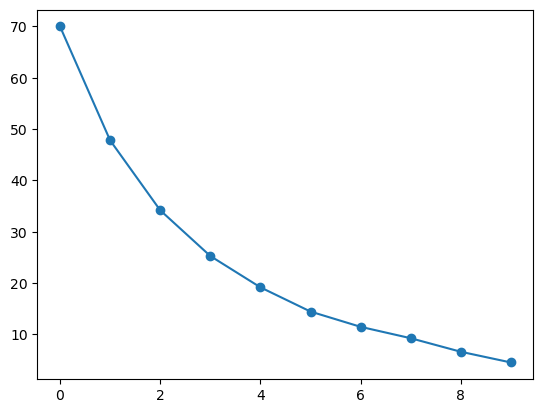

In [232]:
plt.plot(inertia, marker='o')

In [233]:
    km = KMeans(n_clusters=4, random_state=2024)
    km.fit(X_mean_sc)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2024)

In [234]:
km.labels_

array([3, 2, 3, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1])

In [235]:
X_mean['cluster'] = km.labels_

In [236]:
X_mean.sort_values('cluster')

,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points,cluster
,mean,mean,mean,mean,mean,
manager,,,,,,
Jones,15.148750,16.125000,27.816250,41.578750,6.303750,0
Kyle,16.985000,16.312500,22.273750,34.906250,10.193750,0
Nick,17.425000,15.562500,20.762500,42.012500,8.312500,0
Jake,14.417500,16.500000,35.781250,25.325000,6.175000,1
Lauren,18.375000,16.562500,31.912500,24.087500,9.006250,1
Michael,15.243529,19.764706,34.894118,22.058824,8.494118,1
Pat,21.845000,18.125000,35.406250,20.650000,6.587500,1
Ricky,18.431765,14.470588,36.382353,29.311765,7.347059,1


In [237]:
# sns.heatmap(X.drop('cluster', axis=1), cmap='coolwarm', annot=True)

In [238]:
sc_mean_df = pd.DataFrame(X_mean_sc)
sc_mean_df.set_index(X_mean.index, inplace=True)
sc_mean_df['cluster'] = km.labels_

In [239]:
sc_mean_df

,0,1,2,3,4,cluster
manager,,,,,,
Buddy,2.053977,-0.402611,-0.156136,-1.447219,1.124819,3
Eric,-0.142128,-0.713530,-0.576658,0.076827,1.614830,2
Frags,0.774314,-2.782689,-0.402557,-1.039874,-1.038053,3
Jake,-1.301166,0.215592,1.075136,-0.187861,-1.051441,1
Jones,-0.994362,0.053313,-0.410183,1.909250,-0.997815,0
Kyle,-0.223942,0.134452,-1.443752,1.048343,0.622405,0
Lauren,0.359248,0.242638,0.353689,-0.347527,0.127801,1
Michael,-0.954596,1.628365,0.909703,-0.609273,-0.085507,1
Nate,-0.573227,1.081075,-0.592467,-0.790238,1.741774,2


In [240]:
sc_mean_df.rename({0: 'QB_z',
             1: 'DEF_z',
             2: 'WR_z',
             3: 'RB_z',
             4: 'TE_z'}, axis =1, inplace=True)

sc_mean_df = sc_mean_df.sort_values('cluster')

sc_mean_df

,QB_z,DEF_z,WR_z,RB_z,TE_z,cluster
manager,,,,,,
Jones,-0.994362,0.053313,-0.410183,1.909250,-0.997815,0
Kyle,-0.223942,0.134452,-1.443752,1.048343,0.622405,0
Nick,-0.039335,-0.190104,-1.725570,1.965213,-0.161153,0
Jake,-1.301166,0.215592,1.075136,-0.187861,-1.051441,1
Lauren,0.359248,0.242638,0.353689,-0.347527,0.127801,1
Michael,-0.954596,1.628365,0.909703,-0.609273,-0.085507,1
Pat,1.815126,0.918797,1.005205,-0.791044,-0.879631,1
Ricky,0.383064,-0.662619,1.187230,0.326524,-0.563268,1
Tim,0.110103,0.559239,1.627105,-0.457481,-1.295834,1


[2024-01-15 16:10:22,399 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x0000023B330EDB90>
[2024-01-15 16:10:22,399 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x0000023B330EDB90>


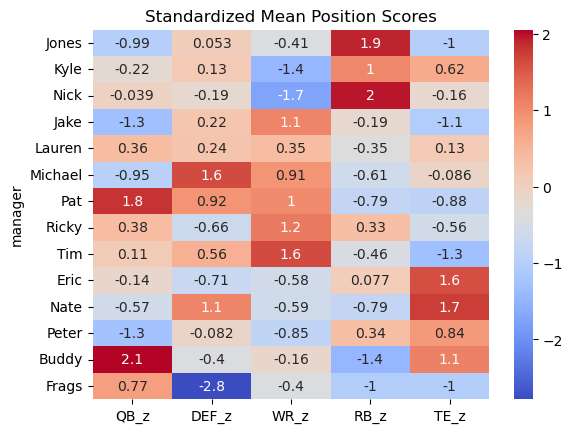

In [250]:
plt.figure()
plt.title('Standardized Mean Position Scores')
sns.heatmap(sc_mean_df.drop('cluster', axis=1), cmap='coolwarm', annot=True);

In [242]:
X_mean.sort_values(('RB_total_points', 'mean'))

,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points,cluster
,mean,mean,mean,mean,mean,
manager,,,,,,
Buddy,22.414286,15.071429,29.178571,15.564286,11.400000,3
Frags,19.364286,9.571429,27.857143,18.721429,6.207143,3
Pat,21.845000,18.125000,35.406250,20.650000,6.587500,1
Nate,16.152500,18.500000,26.838750,20.656250,12.881250,2
Michael,15.243529,19.764706,34.894118,22.058824,8.494118,1
Tim,17.781176,17.294118,38.741176,23.235294,5.588235,1
Lauren,18.375000,16.562500,31.912500,24.087500,9.006250,1
Jake,14.417500,16.500000,35.781250,25.325000,6.175000,1


In [243]:
sc = StandardScaler()
X_std_sc = sc.fit_transform(X_std)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [244]:
km.fit(X_std)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

KMeans(n_clusters=4, random_state=2024)

In [245]:
sc_std_df = pd.DataFrame(X_std_sc)
sc_std_df.set_index(X_std.index, inplace=True)
sc_std_df['cluster'] = km.labels_

In [246]:
sc_std_df.rename({0: 'QB_z',
             1: 'DEF_z',
             2: 'WR_z',
             3: 'RB_z',
             4: 'TE_z'}, axis =1, inplace=True)

sc_std_df = sc_std_df.sort_values('cluster')

sc_std_df

,QB_z,DEF_z,WR_z,RB_z,TE_z,cluster
manager,,,,,,
Kyle,0.615717,0.672013,-1.584678,0.845171,-0.372260,0
Lauren,0.711271,1.246464,-0.131067,0.065138,-0.055007,0
Nick,0.489846,0.407624,-0.476957,0.118991,0.154717,0
Pat,1.112787,2.472692,-1.433441,-0.115635,0.080319,0
Eric,1.166192,-1.648621,0.638800,0.018838,2.069790,1
Peter,0.121471,-1.300512,0.337039,0.792274,0.024122,1
Ricky,0.678290,0.062356,1.491623,0.180781,-1.397171,1
Jones,-0.873520,0.114243,-1.056286,2.798381,-0.547579,2
Buddy,-0.754822,-0.417977,-0.436687,-0.695661,0.735134,3


[2024-01-15 16:10:48,525 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x0000023B34448310>
[2024-01-15 16:10:48,525 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x0000023B34448310>


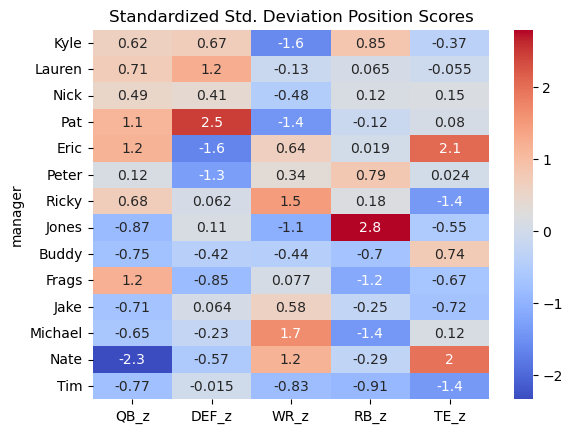

In [251]:
plt.figure()
plt.title('Standardized Std. Deviation Position Scores')
sns.heatmap(sc_std_df.drop('cluster', axis=1), cmap='coolwarm', annot=True);

In [248]:
X_std

,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points
,std,std,std,std,std
manager,,,,,
Buddy,6.411976,6.342340,11.444661,9.396940,7.561848
Eric,9.623323,4.314817,13.908430,11.128934,9.627534
Frags,9.693926,5.625687,12.622002,8.280485,5.391084
Jake,6.478888,7.136759,13.775157,10.479027,5.310053
Jones,6.213551,7.219187,10.025259,17.866736,5.576557
Kyle,8.703098,8.138130,8.814796,13.132020,5.847902
Lauren,8.862835,9.084556,12.144786,11.241167,6.338924
Michael,6.587698,6.647644,16.238399,7.686356,6.605440
